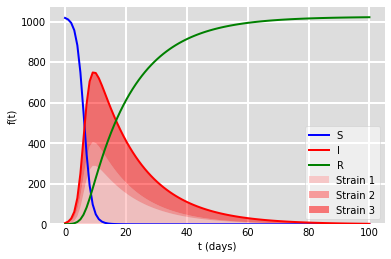

In [28]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 2 ** 10
# Initial number of infected and recovered individuals, I0 and R0.
R0 = 0
I01 = 1
I02 = 3
I03 = 2
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I01 - I02 - I03 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
betas, gammas = [0.001, 0.0007, 0.0009] , [1./14, 1./12, 1./17] 
# A grid of time points (in days)
t = np.linspace(0, 100, 100)

# The SIR model differential equations.
def deriv(y, t, betas, gammas):
    S, I1, I2, I3, R = y
    dSdt = -betas[0] * S * I1 -betas[1] * S * I2 - betas[2] * S * I3
    dI1dt = betas[0] * S * I1 - gammas[0] * I1
    dI2dt = betas[1] * S * I2 - gammas[1] * I2
    dI3dt = betas[2] * S * I3 - gammas[2] * I3
    dRdt = gammas[0] * I1 + gammas[1] * I2 + gammas[2] * I3
    return dSdt, dI1dt, dI2dt, dI3dt, dRdt

# Initial conditions vector
y0 = S0, I01, I02, I03, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(betas, gammas))
S, I1, I2, I3, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S, 'b', alpha=1, lw=2, label='S')
ax.plot(t, I1 + I2 + I3, 'r', alpha=1, lw=2, label='I')
ax.plot(t, R, 'g', alpha=1, lw=2, label='R')
ax.stackplot(t, [I1, I2, I3], colors=['#ffa1a1', '#ff4a4a', '#ff0000'], alpha=0.5, lw=2, labels=['Strain 1', 'Strain 2', 'Strain 3'])
ax.set_xlabel('t (days)')
ax.set_ylabel('f(t)')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()